In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import json
from datetime import datetime as dt
import random

In [2]:
pd.set_option('display.max_colwidth', None, "display.max_rows", None, "display.max_columns", None)
pd.options.mode.chained_assignment = None

In [3]:
load_csv = (lambda config: pd.read_csv(f'./data/{config}.csv', delimiter=',', index_col=0))

df_configs = {config: load_csv(config) for config in [
    "1tls_2x2",
    "1tls_3x3",
    "1tls_4x4"
]}

In [4]:
for config in df_configs:
    print(config)
    display(df_configs[config].head(2))

1tls_2x2


,avg_acc_waiting_time,avg_delay,avg_queue_length,avg_waiting_time,con,con_p_rate,ctrl_con_p_rate,ctrl_con_p_rate_round,ep,id,id_con,sum_acc_waiting_time,sum_delay,sum_queue_length,sum_waiting_time,veh_n,veh_n_p_hour
0,258.438608,0.905344,6.374601,36.315660,True,0.137,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_con,21181.386581,70.506871,50.996805,3192.290735,76.779553,"[1000.0, 200.0, 500.0, 200.0]"
1,238.258406,0.896514,5.580298,27.384255,False,1.000,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_def,18650.903974,65.835718,44.642384,2267.880795,72.238411,"[1000.0, 200.0, 500.0, 200.0]"


1tls_3x3


,avg_acc_waiting_time,avg_delay,avg_queue_length,avg_waiting_time,con,con_p_rate,ctrl_con_p_rate,ctrl_con_p_rate_round,ep,id,id_con,sum_acc_waiting_time,sum_delay,sum_queue_length,sum_waiting_time,veh_n,veh_n_p_hour
0,34.930427,0.743465,1.208809,31.103925,True,0.137,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_con,1233.539924,23.282053,14.505703,1090.296578,30.760456,"[1000.0, 200.0, 500.0, 200.0]"
1,9.055964,0.687747,0.702381,8.749424,False,1.000,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_def,223.338776,16.805420,8.428571,215.371429,24.269388,"[1000.0, 200.0, 500.0, 200.0]"


1tls_4x4


,avg_acc_waiting_time,avg_delay,avg_queue_length,avg_waiting_time,con,con_p_rate,ctrl_con_p_rate,ctrl_con_p_rate_round,ep,id,id_con,sum_acc_waiting_time,sum_delay,sum_queue_length,sum_waiting_time,veh_n,veh_n_p_hour
0,37.482625,0.768049,1.085701,29.228273,True,0.137,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_con,1399.848485,25.945323,17.371212,1087.878788,33.337121,"[1000.0, 200.0, 500.0, 200.0]"
1,8.246283,0.693988,0.552428,7.890754,False,1.000,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_def,204.859504,16.955061,8.838843,196.115702,24.318182,"[1000.0, 200.0, 500.0, 200.0]"


In [5]:
make_palette = (lambda unique: dict(zip(unique, sns.color_palette(n_colors=len(unique)))))

c_palette = make_palette([
    'rlcontroller_con', 'rlcontroller_def',
    'maxpressurebaseline_def', 'sotlbaseline_def', 
    'maxpressurebaseline_con', 'uniformbaseline_def'
])

In [6]:
titles = {
    "1tls_2x2": "1 TL, 2 phases, 2x2 lanes",
    "1tls_3x3": "1 TL, 4 phases, 3x3 lanes",
    "1tls_4x4": "1 TL, 4 phases, 4x4 lanes",
    
    "ep": "Episode", 
    "ctrl_con_p_rate": "CV penetration rate",
    
    "sum_acc_waiting_time": "Mean sum accumutaled waiting time", 
    "sum_waiting_time": "Mean sum waiting time", 
    "sum_delay": "Mean sum delay",
    "sum_queue_length": "Mean sum queue length", 
    "avg_acc_waiting_time": "Mean accumutaled waiting time", 
    "avg_waiting_time": "Mean waiting time", 
    "avg_delay": "Mean delay", 
    "avg_queue_length": "Mean queue length", 
    "veh_n": "Mean occupancy", 
    
    "rlcontroller_con": "DQN partial detection",
    "rlcontroller_def": "DQN full detection",
    "maxpressurebaseline_con": "Max Pressure partial detection",
    "maxpressurebaseline_def": "Max Pressure full detection",
    "sotlbaseline_def": "SOTL full detection",
    "uniformbaseline_def": "Uniform"
}

In [7]:
def plot_density(config, d):
    h, w = 2, 2

    fig, axes = plt.subplots(h, w, figsize=(20, 10))

    hue = 'id_con'
    data = df_configs[config].loc[df_configs[config][hue].isin(d)]
    y = ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']
    hues = data[hue].unique().tolist()

    fig.suptitle(f'{titles[config]}: {", ".join(sorted([titles[t] for t in hues]))} (1000 episodes)', fontsize=16)

    for a in range(h * w):
        i, j = (a // w) % h, a % w
        for k in hues:
            sns.kdeplot(ax=axes[i, j], data=data.loc[data[hue] == k][y[a]], color=c_palette[k])
        axes[i, j].set_title(f'{titles[y[a]]} (episode density)')
        axes[i, j].set(xlabel=titles[y[a]])
        axes[i, j].legend(handles=[
            patches.Patch(color=c_palette[k], label=l) for (l, k) in 
            sorted([(titles[k], k) for k in hues])
        ], loc=1)
        None

In [8]:
def plot_line(config, d, x):
    h, w = 2, 2

    fig, axes = plt.subplots(h, w, figsize=(20, 10))

    data = df_configs[config].loc[df_configs[config]['id_con'].isin(d)]
    y = ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']
    hue = 'id_con'
    hues = data[hue].unique().tolist()

    fig.suptitle(f'{titles[config]}: {", ".join(sorted([titles[t] for t in hues]))} (1000 episodes)', fontsize=16)

    for a in range(h * w):
        i, j = (a // w) % h, a % w
        sns.lineplot(ax=axes[i, j], data=data, x=x, y=y[a], hue=hue, palette=c_palette)
        axes[i, j].set_title(f'{titles[y[a]]} / {titles[x]}')
        axes[i, j].set(xlabel=titles[x], ylabel=titles[y[a]])
        axes[i, j].legend(handles=[
            patches.Patch(color=c_palette[k], label=l) for (l, k) in 
            sorted([(titles[k], k) for k in hues])
        ], loc=1)
    None

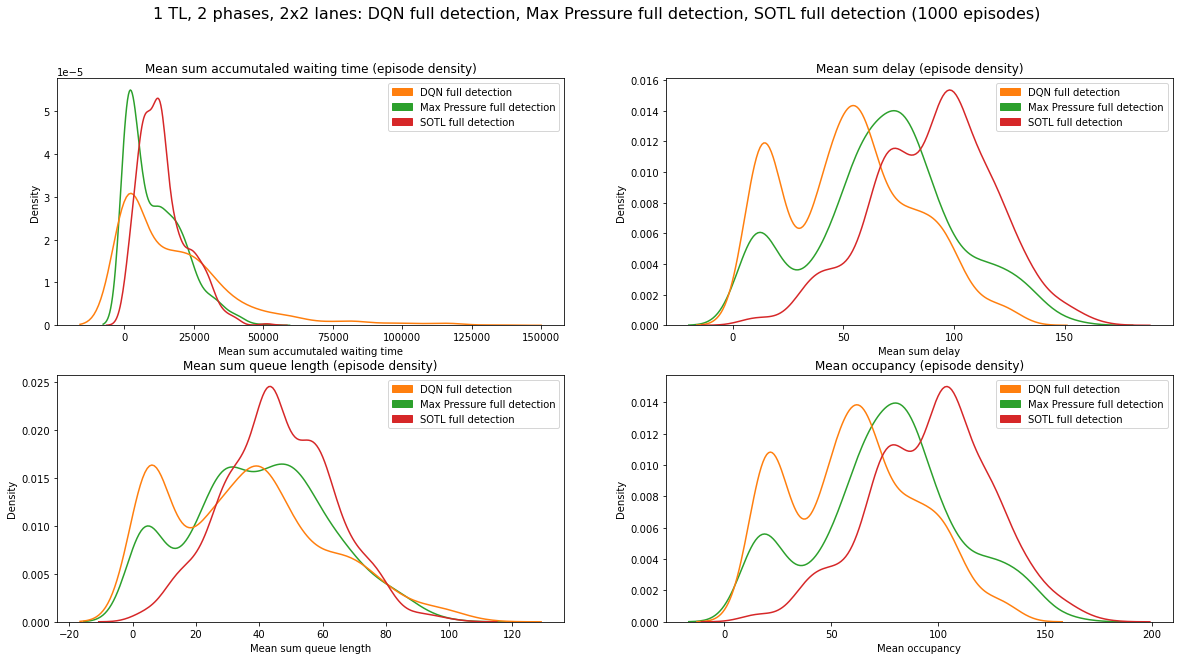

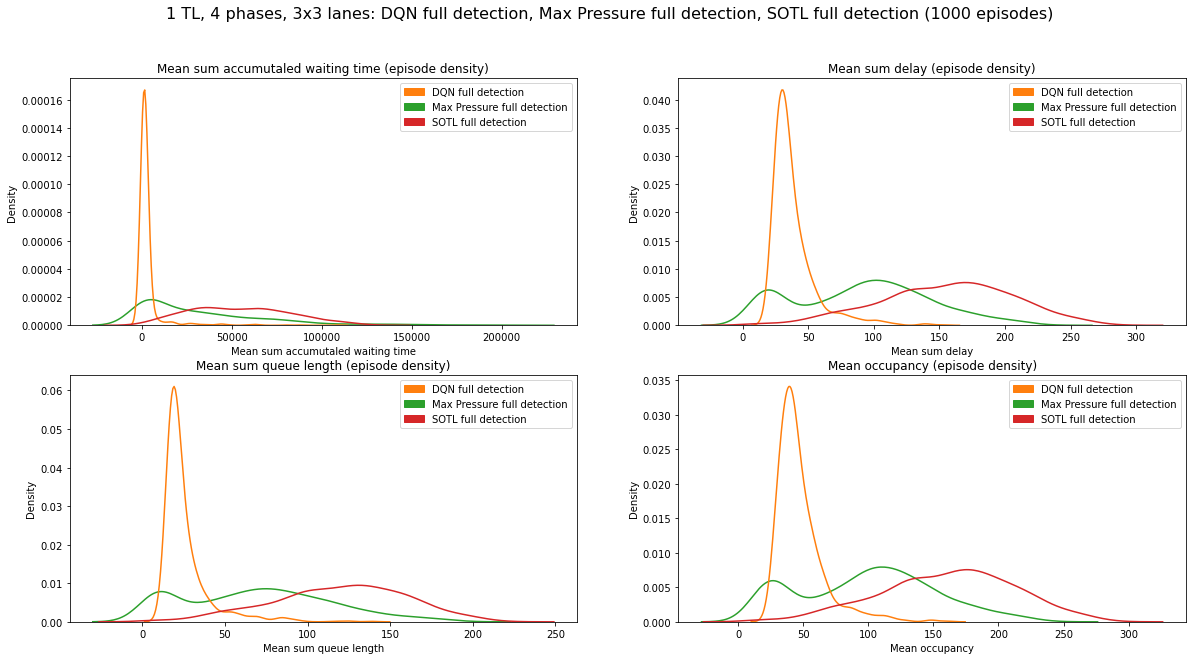

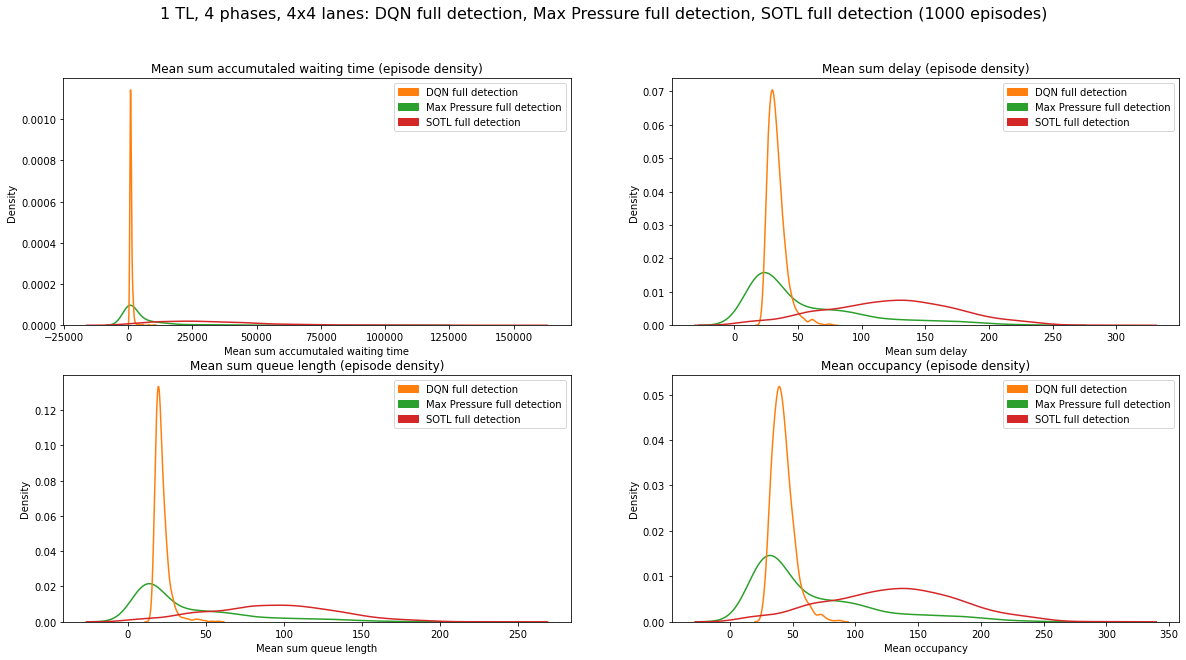

In [9]:
for config in df_configs:
    plot_density(config, ['rlcontroller_def', 'maxpressurebaseline_def', 'sotlbaseline_def'])

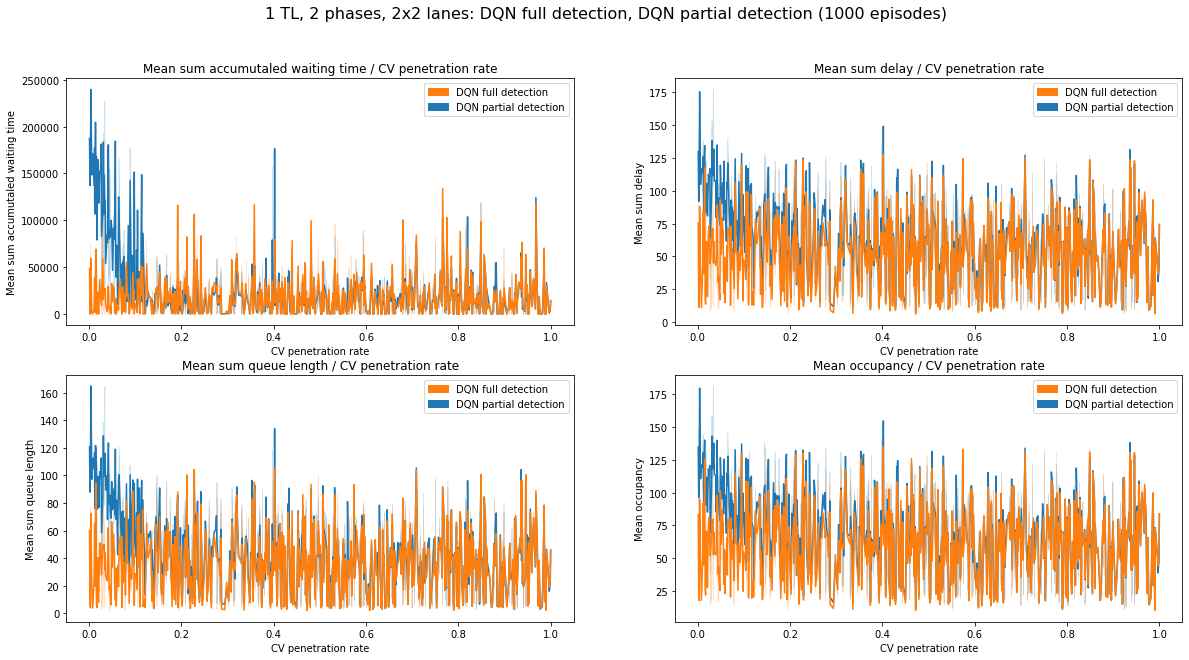

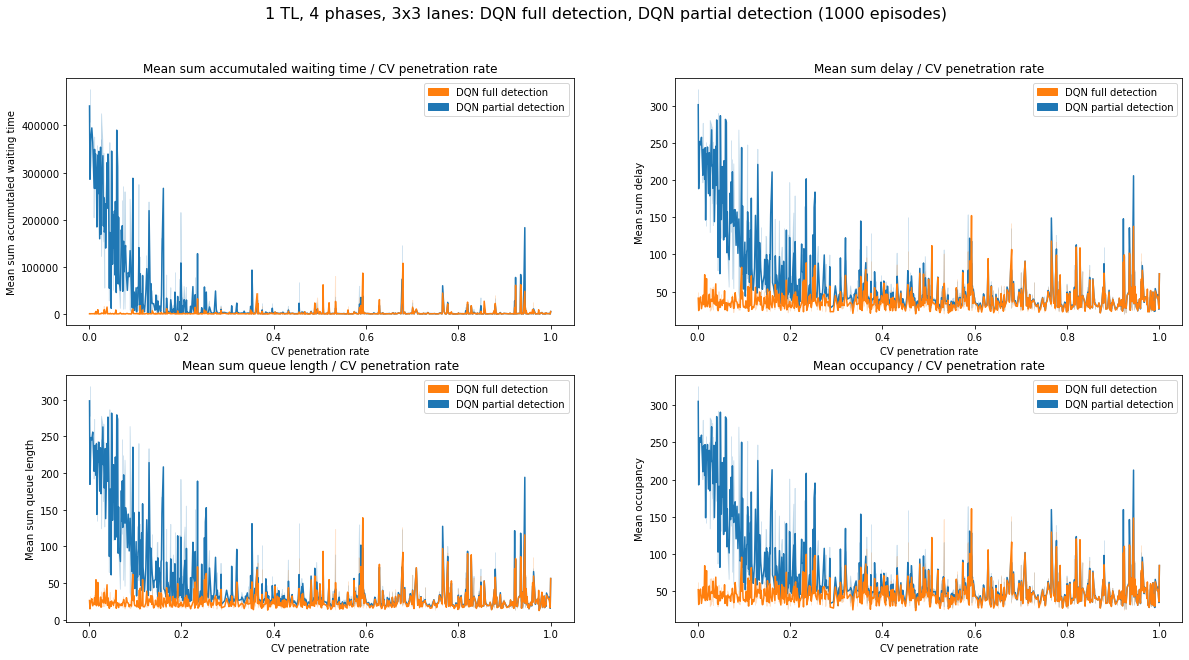

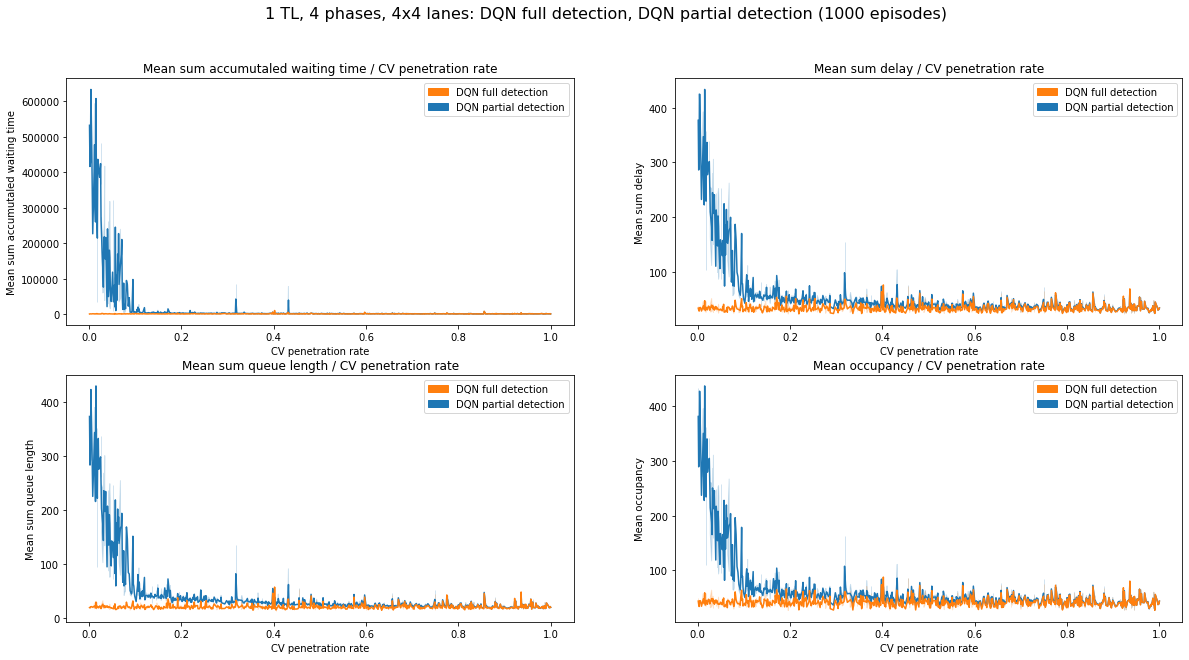

In [10]:
for config in df_configs:
    plot_line(config, ['rlcontroller_con', 'rlcontroller_def'], 'ctrl_con_p_rate')

In [11]:
###################################################################################################################

In [12]:
df_id = (
    df_configs["1tls_3x3"][['id_con', 'sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']]
    .groupby('id_con').mean().transpose()
)

df_id

id_con,maxpressurebaseline_con,maxpressurebaseline_def,rlcontroller_con,rlcontroller_def,sotlbaseline_def,uniformbaseline_def
sum_acc_waiting_time,52698.094151,32511.483602,29102.602976,3127.450392,54466.575342,36168.300746
sum_delay,97.278446,90.913796,64.559426,38.355773,155.461930,134.236232
sum_queue_length,79.268343,69.284461,51.642442,25.666908,119.401413,101.946896
veh_n,105.079764,99.069016,73.109461,47.493547,161.253484,140.873687


In [13]:
# plot_line(['maxpressurebaseline_con', 'maxpressurebaseline_def'], 'ctrl_con_p_rate')

In [14]:
# plot_line(['rlcontroller_def', 'maxpressurebaseline_def', 'sotlbaseline_def'], 'ctrl_con_p_rate')

In [15]:
# plot_line(['rlcontroller_def', 'maxpressurebaseline_def', 'sotlbaseline_def'], 'ep')

In [16]:
# plot_line(['sotlbaseline_def', 'uniformbaseline_def'], 'ep')

In [17]:
###################################################################################################################

In [18]:
"""
def df_hl():
    (n, s, w, e) = (1, 2, 0, 3)
    (h, l) = (500, 500)
    
    high = (lambda v, i: json.loads(v)[i] > h)
    low = (lambda v, i: json.loads(v)[i] <= l)
    
    return (
        df_ep.loc[df_ep["veh_n_p_hour"].map(lambda v: high(v,n) and high(v,s) and high(v,w) and high(v,e))],
        df_ep.loc[df_ep["veh_n_p_hour"].map(lambda v: low(v,n) and low(v,s) and low(v,w) and low(v,e))],
        df_ep.loc[df_ep["veh_n_p_hour"].map(lambda v: (high(v,n) and high(v,s) and low(v,w) and low(v,e)) or 
                                                      (low(v,n) and low(v,s) and high(v,w) and high(v,e)))],
        df_ep.loc[df_ep["veh_n_p_hour"].map(lambda v: (high(v,n) and low(v,s) and high(v,w) and low(v,e)) or 
                                                      (low(v,n) and high(v,s) and low(v,w) and high(v,e)))],
    )

df_ep_hhhh, df_ep_llll, df_ep_hhll, df_ep_hlhl = df_hl()

display(df_ep_hhhh)
display(df_ep_llll)
display(df_ep_hhhh)
display(df_ep_hlhl)
"""
None

In [19]:
"""
def plot_y_by_pcon_rl_maxp_sotl_uni(y):
    plt.figure(figsize=(20,10))
    sns.lineplot(data=df_ep, x='ctrl_con_p_rate', y=y, hue='id_con')
    plt.xlabel('CV penetration rate')
    plt.ylabel(titles[y])
    plt.title(f'{titles[y]} / CV penetration rate', fontsize=12)
    None
    
def plot_y_by_pcon_rl_maxp(y):
    plt.figure(figsize=(20,10))
    sns.lineplot(data=df_ep.loc[df_ep['id'] in ['rlcontroller', 'maxpressurebaseline']], x='ctrl_con_p_rate', y=y, hue='id_con')
    plt.xlabel('CV penetration rate')
    plt.ylabel(titles[y])
    plt.title(f'{titles[y]} / CV penetration rate', fontsize=12)
    None
    
def plot_y_by_pcon_rl(y):
    plt.figure(figsize=(20,10))
    sns.lineplot(data=df_ep.loc[df_ep['id'] == 'rlcontroller'], x='ctrl_con_p_rate', y=y, hue='id_con')
    plt.xlabel('CV penetration rate')
    plt.ylabel(titles[y])
    plt.title(f'{titles[y]} / CV penetration rate', fontsize=12)
    None
"""

"""
plot_y_by_pcon_rl("sum_acc_waiting_time")
plot_y_by_pcon_rl("sum_delay")
plot_y_by_pcon_rl("sum_queue_length")
plot_y_by_pcon_rl("veh_n")
"""
None

In [20]:
"""
def pct_change_y(y, x1, x2, _df):
    ids = (x1, x2)
    ids_sorted = sorted(ids)

    df = _df.loc[(_df['id_con'] == ids[0]) | (_df['id_con'] == ids[1]), ['ep', y, 'ctrl_con_p_rate', 'id_con']]

    if ids[0]==ids_sorted[0]:
        df.index = range(1, len(df) + 1)
    else:
        df.index = range(len(df), 0, -1)
    df = df.sort_index()

    df_pct_change = pd.merge(
        df.groupby('ep')[y].pct_change().dropna(), 
        df[['ctrl_con_p_rate', 'id_con']], 
        how='left', left_index=True, right_index=True
    ).rename(columns={y: f'{y}_pct_change', 'id_con': 'pct_change'})

    df_pct_change['pct_change'] = json.dumps(ids)

    plt.figure(figsize=(20,10))
    sns.lineplot(data=df_pct_change, x='ctrl_con_p_rate', y=f'{y}_pct_change', hue='pct_change')
    plt.title(f'{titles[y]} pct change from {x1} to {x2})', fontsize=12)
    
    return df_pct_change
"""

# _ = pct_change_y('avg_delay', 'rlcontroller_def', 'rlcontroller_con', df_ep)

None